# The Singular Value Decomposition

Often more important in today's world than the eigenvalue decomposition.  Shows up in machine learning, image compression, and many discrete applications.

## Definition

For any $m \times n$ matrix $A$ of rank $r$:

$$A = U \Sigma V^T = \\
\begin{pmatrix} u_1 & \cdots & u_r & \cdots & u_m\end{pmatrix} \begin{pmatrix} \sigma_1 & & & & & \\ & \sigma_2 & & & & \\ & & \ddots & & & \\ & & & \sigma_r & & \\ & & & & 0 & \\ & & & & & \ddots \end{pmatrix} \begin{pmatrix} v_1 & \cdots & v_r & \cdots & v_n\end{pmatrix}^T \\
= \sigma_1 u_1 v_1^T + \cdots \sigma_r u_r v_r^T
$$

(more generally: $U \Sigma V^H$ for complex matrices)

* $U$ is $m\times m$ orthogonal (unitary) matrix of **left singular vectors** $u_k$
* $V$ is $n \times n$ orthogonal (unitary) of **right singular vectors** $v_k$
* $\Sigma$ is $m\times n$  diagonal matrix of r **singular values** (real) $\sigma_k > 0$ (and $n-r$ columns / $m-r$ rows of zeros)

The most basic SVD is a matrix decomposition of a matrix A into $U$ Diagonal($\sigma$) $V^T$, where $U$ and $V$ are  square orthogonal and $\sigma$ is a vector of decreasing singular
values that are non-negative. The notation $\Sigma$ denotes the diagonal matrix

$$
\Sigma = \begin{pmatrix}
\sigma_1 & 0 & \cdots \\
0 & \sigma_2 & \cdots \\
& & \ddots
\end{pmatrix}
$$

* The vectors $u_1, \ldots, u_r$ form an **orthonormal basis for the column space** $C(A)$, and $v_1, \ldots, v_r$ form an **orthonormal basis for the row space** $C(A^T)$.

### Square Example

In [1]:
A = randn(5,5)
U,σ,V = svd(A)
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
 -0.837887  -0.00360708  -0.533729   0.073474    0.0875645
 -0.228281  -0.261529     0.496507   0.0438725   0.794385 
  0.263465  -0.530214    -0.299503   0.746685    0.047111 
 -0.298982  -0.682087     0.360215  -0.20127    -0.524502 
  0.295009  -0.430372    -0.499156  -0.628195    0.289765 

5-element Array{Float64,1}:
 3.09077 
 2.47409 
 1.99544 
 1.3849  
 0.093338

5×5 Array{Float64,2}:
  0.581876    0.486551   -0.194982   0.21415    -0.583789
  0.575104    0.0718241   0.386774  -0.669107    0.258454
 -0.499703    0.552859   -0.268021  -0.588264   -0.163567
  0.26899     0.0523952  -0.771478   0.0126204   0.574074
  0.0928225  -0.670605   -0.38128   -0.400278   -0.485876

In [2]:
σ
Σ = Diagonal(σ)

5×5 Diagonal{Float64}:
 3.09077   ⋅        ⋅        ⋅       ⋅      
  ⋅       2.47409   ⋅        ⋅       ⋅      
  ⋅        ⋅       1.99544   ⋅       ⋅      
  ⋅        ⋅        ⋅       1.3849   ⋅      
  ⋅        ⋅        ⋅        ⋅      0.093338

In [4]:
round.(U'U,2)

5×5 Array{Float64,2}:
  1.0  -0.0  -0.0  -0.0   0.0
 -0.0   1.0  -0.0  -0.0   0.0
 -0.0  -0.0   1.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0  -0.0
  0.0   0.0  -0.0  -0.0   1.0

In [6]:
round.(V'V,2)

5×5 Array{Float64,2}:
  1.0   0.0   0.0  -0.0   0.0
  0.0   1.0   0.0   0.0  -0.0
  0.0   0.0   1.0  -0.0   0.0
 -0.0   0.0  -0.0   1.0  -0.0
  0.0  -0.0   0.0  -0.0   1.0

In [7]:
σ

5-element Array{Float64,1}:
 3.09077 
 2.47409 
 1.99544 
 1.3849  
 0.093338

In [8]:
Σ=Diagonal(σ)
U*Σ*V'

5×5 Array{Float64,2}:
 -1.28656     -1.9679      1.51341    0.130546   0.126973
 -0.948825    -0.0905405  -0.318564  -0.944703  -0.06968 
  0.170982    -0.547836   -1.58101    0.626952   0.767094
 -1.53004     -0.200789   -0.491876  -0.923142   0.907201
  0.00459912   0.651771   -0.269987   0.962445   1.51355 

In [9]:
A

5×5 Array{Float64,2}:
 -1.28656     -1.9679      1.51341    0.130546   0.126973
 -0.948825    -0.0905405  -0.318564  -0.944703  -0.06968 
  0.170982    -0.547836   -1.58101    0.626952   0.767094
 -1.53004     -0.200789   -0.491876  -0.923142   0.907201
  0.00459912   0.651771   -0.269987   0.962445   1.51355 

### "tall-skinny" full column rank example

In [ ]:
A = randn(5,3)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V);

In [ ]:
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal

display(A)
U*Σ*V'

In [ ]:
Σ

### short fat matrix

In [ ]:
A = randn(3,5)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V)
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal
U*Σ*V'
A

In [ ]:
A

In [ ]:
Σ

Thin: for tall skinny, U is the size of A, Σ is square <br>
Thin: for short fat, V is the size of A, Σ is square 

In [ ]:
A = randn(5,3)
U,σ,V = svd(A) # thin = true
display(U)
display(round(U'U,2))
display(A)
U*Diagonal(σ)*V'

In [ ]:
A = randn(3,5)
U,σ,V = svd(A)
display(V)
display(round(V'V,2))
display(A)
U*Diagonal(σ)*V'

## Data "compression"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0   575k      0 --:--:-- --:--:-- --:--:--  637k


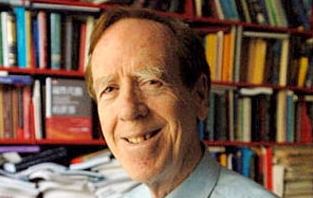

In [10]:
using Images, Interact
picture = download("http://web.mit.edu/jfrench/Public/gstrang.png")
pimage = load(picture)

In [11]:
p = float.(channelview(pimage)) # convert to an array

3×198×313 Array{Float32,3}:
[:, :, 1] =
 0.501961  0.407843  0.27451   0.152941  …  0.811765  0.729412  0.690196
 0.576471  0.466667  0.282353  0.129412     0.776471  0.686275  0.631373
 0.592157  0.454902  0.270588  0.137255     0.788235  0.701961  0.611765

[:, :, 2] =
 0.478431  0.4       0.278431  0.156863  …  0.792157  0.717647  0.67451 
 0.560784  0.462745  0.298039  0.133333     0.74902   0.670588  0.607843
 0.572549  0.45098   0.27451   0.141176     0.764706  0.686275  0.576471

[:, :, 3] =
 0.47451   0.403922  0.298039  0.168627  …  0.788235  0.717647  0.67451 
 0.556863  0.478431  0.317647  0.145098     0.741176  0.670588  0.603922
 0.560784  0.454902  0.294118  0.145098     0.74902   0.678431  0.564706

...

[:, :, 311] =
 0.180392  0.14902   0.14902   0.145098  …  0.521569  0.576471  0.627451
 0.203922  0.211765  0.211765  0.160784     0.431373  0.529412  0.588235
 0.196078  0.2       0.211765  0.196078     0.258824  0.333333  0.447059

[:, :, 312] =
 0.160784  0.12549   0.

In [12]:
pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
Ur,σr,Vr = svd(pr)
Ug,σg,Vg = svd(pg)
Ub,σb,Vb = svd(pb)

(Float32[-0.0425342 -0.0450355 … 0.00151836 0.00756665; -0.0404301 -0.0474971 … 0.0181529 -0.0318149; … ; -0.143038 0.101536 … 0.0478255 -0.0318742; -0.144002 0.111712 … 0.0020869 -0.00648022], Float32[85.0721, 21.0869, 16.5932, 14.0062, 11.7329, 10.1639, 9.09969, 7.38199, 7.21165, 6.61043  …  0.0242462, 0.022777, 0.0226533, 0.0215464, 0.0208985, 0.0198097, 0.0191087, 0.0189206, 0.0177044, 0.0170277], Float32[-0.0697387 -0.0166765 … -0.00833062 -0.00208743; -0.0695658 -0.0410424 … 0.0132683 0.054568; … ; -0.0231986 -0.00117249 … 0.00207896 -0.0117388; -0.0217245 0.00349054 … 0.0677017 0.0426328])

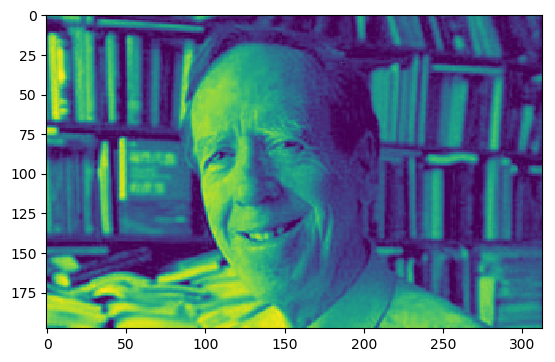

PyObject <matplotlib.image.AxesImage object at 0x135b58e10>

In [15]:
using PyPlot
imshow(pg)

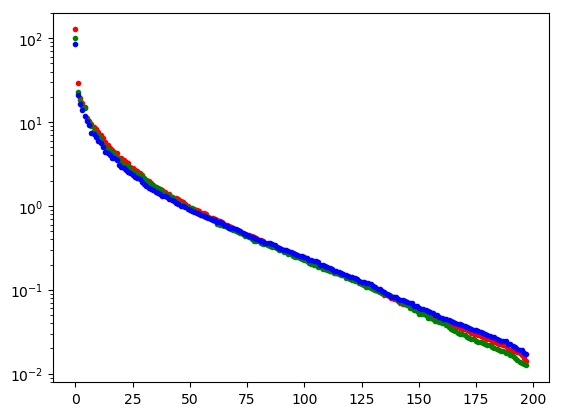

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x135efead0>

In [18]:
semilogy(σr, "r.")
semilogy(σg, "g.")
semilogy(σb, "b.")

In [19]:
using Interact

Interact.Slider{Int64}(1: "input" = 1 Int64 , "", 1, 1:40, "horizontal", true, "d", true)

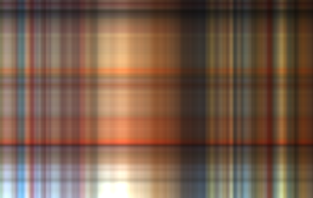

In [20]:
@manipulate for k=slider(1:40,value=1)
    p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
    p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
    p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
    img = colorview(RGB, p̂r,p̂g,p̂b) 
end

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   552  100   552    0     0   5345      0 --:--:-- --:--:-- --:--:--  5520
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13533  100 13533    0     0   121k      0 --:--:-- --:--:-- --:--:--  124k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12257  100 12257    0     0   169k      0 --:--:-- --:--:-- --:--:--  178k


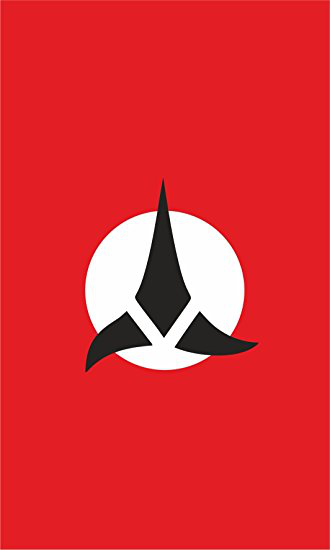

In [22]:
pics = Dict{String,Array}()
pics["Ireland"] = ImageMagick.load(download("https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/500px-Flag_of_Ireland.svg.png"))
pics["USA"] = ImageMagick.load(download("https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/640px-Flag_of_the_United_States.svg.png"))
pics["Klingon"] = ImageMagick.load(download("https://images-na.ssl-images-amazon.com/images/I/51ibu5dAb9L._SY550_.jpg"))

Interact.Options{:ToggleButtons,Any}(11: "input-4" = USA Any , "flag", "USA", "USA", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("USA"=>"USA","Ireland"=>"Ireland","Klingon"=>"Klingon"), Dict{Any,Any}(Pair{Any,Any}("USA", "USA"),Pair{Any,Any}("Ireland", "Ireland"),Pair{Any,Any}("Klingon", "Klingon"))), Any[], Any[], true, "horizontal")

Interact.Slider{Int64}(13: "input-5" = 1 Int64 , "", 1, 1:40, "horizontal", true, "d", true)

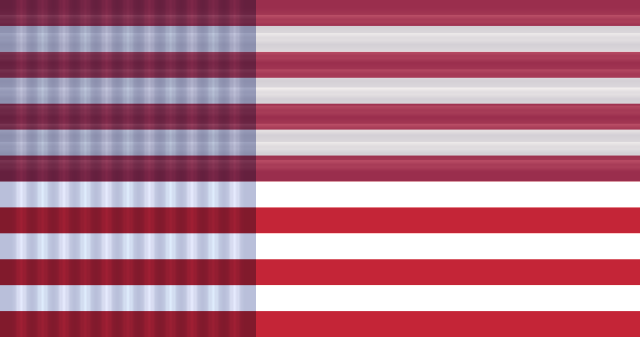

In [23]:

@manipulate for flag in collect(keys(pics)), k=slider(1:40,value=1)
    p = float.(channelview(pics[flag])) # convert to an array
    pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
    Ur,σr,Vr = svd(pr)
    Ug,σg,Vg = svd(pg)
    Ub,σb,Vb = svd(pb)
    p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
    p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
    p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
    colorview(RGB, p̂r,p̂g,p̂b) 
end

Moral of the story:  if k is large enough
    U[:,1:k] * Diagonal(sigma(1:k)) * V[:,1:k]'
    is a good approsimation to A often requiring less storage and less computation

let $u=$Ur[:,1:1], that is the first column of Ur <br>
let $v=$Vr[:,1:1], that is the first column of Vr <br>
let $\sigma$  be the first sing value: Diagonal(σr[1:k])

Consider $u*\sigma*v'$

Now consider k=2 and we now have
$u_1*\sigma_1*v_1' + u_2*\sigma_2*v_2'$


# What happens when a matrix has low rank?

The four fundamental subspaces done nicely --- could have been an early lecture if we accepted the existence of the SVD

U  contains a basis for the column space and the left nullspace.

V contains a basis for the row space and the nullspace.

## The svd not as an eigenproblem

In [ ]:
A = eye(5)
svdvals(A)

In [ ]:
A = Diagonal(randn(5))

In [ ]:
svdvals(A) # absolute value of diagonals
# svdvals always are in monotonically non-increasing order

In [ ]:
Q,_ = qr(randn(5,5))

In [ ]:
Q'Q

In [ ]:
svdvals(Q)
# Q = Q * (Σ=I) * (V=I)'

In [ ]:
D = Diagonal(randn(5))

In [ ]:
svdvals(Q*D)

In [ ]:
svdvals(D*Q)

## The SVD as an eigenproblem

In [ ]:
# Notice if A = U Σ V' then
# A'A = U Σ V'V Σ' U'
# A'A = V Σ² V'
# A*A' = U Σ² U'

Notice that the EIGENVALUES of A'A are the squares
of the singular values, and the EIGENVECTORS are the
RIGHT singular vectors of A <br>

Notice that the EIGENVALUES of A*A' are the squares
of the singular values, and the EIGENVECTORS are the
LEFT singular vectors of A <br>


In [24]:
A = randn(5,3)

5×3 Array{Float64,2}:
 -0.168271  -0.339852  -2.04547  
  1.18993    0.283447  -0.863771 
 -0.272325  -0.514321  -0.329903 
 -0.394661   0.617962   0.0820683
  0.22752    0.969223   0.433193 

In [25]:
svdvals(A).^2 |> sort

3-element Array{Float64,1}:
 0.933419
 2.22308 
 5.58433 

In [26]:
eigvals(A'A) |> sort

3-element Array{Float64,1}:
 0.933419
 2.22308 
 5.58433 

In [27]:
eigvals(A*A') |> sort

5-element Array{Float64,1}:
 -5.84712e-16
 -1.64689e-16
  0.933419   
  2.22308    
  5.58433    

In [ ]:
U,σ,V = svd(A)

In [ ]:
E,X = eig(A'A)
display(X)

In [ ]:
V[:,5:-1:1]

In [ ]:
E,X = eig(A*A')
display(X)

In [ ]:
U[:,5:-1:1]

How many parameters are there "REALLY" in an n x n orthogonal matrix Q?

The answer is $n(n-1)/2$ (or "n choose 2")

one can easily check there are $n(n+1)/2$ constraints in $Q^T Q=I$:

In [ ]:
n(n-1)/2 + n + n(n-1)/2 